In [1]:
import pandas as pd


RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [2]:
df = pd.read_csv('encoded_jeju.csv')

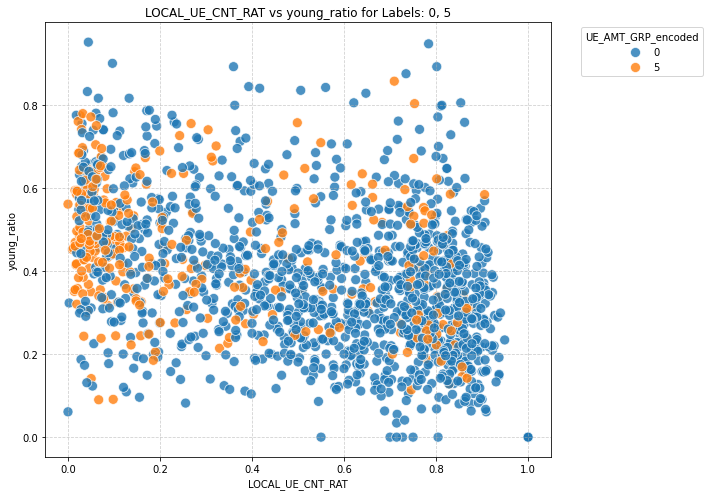


'LOCAL_UE_CNT_RAT'와 'young_ratio'의 산점도를 선택된 'UE_AMT_GRP_encoded' 라벨별로 구분하여 'filtered_scatter_plot_by_target.png' 파일로 저장했습니다.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 종속변수 열 이름 (CSV 파일의 실제 열 이름으로 변경하세요)
target_col_name = 'UE_AMT_GRP_encoded'

# 산점도를 그릴 두 개의 입력 변수 열 이름 (CSV 파일의 실제 열 이름으로 변경하세요)
# 이 변수들은 수치형(numerical) 데이터여야 합니다.
feature_x_name = 'LOCAL_UE_CNT_RAT'
feature_y_name = 'young_ratio'

# 여기에 보고 싶은 종속변수 라벨 값을 리스트로 입력하세요.
# 예시로 몇 가지 라벨을 선택했습니다. 실제 데이터의 라벨 값으로 변경해주세요.
# 예: selected_labels = ['Label_A', 'Label_B']
# 예: selected_labels = [0, 1]
selected_labels = [0, 5] # <--- 이 부분을 원하는 라벨로 수정하세요!

# 데이터프레임이 존재하는지 확인 (이전 세션에서 'df'가 생성되었다고 가정)
if 'df' in locals() and not df.empty:
    if feature_x_name in df.columns and feature_y_name in df.columns and target_col_name in df.columns:
        # 선택된 라벨에 해당하는 데이터만 필터링합니다.
        df_filtered = df[df[target_col_name].isin(selected_labels)].copy()

        if not df_filtered.empty:
            # 산점도 생성
            plt.figure(figsize=(10, 7))
            sns.scatterplot(
                data=df_filtered,
                x=feature_x_name,
                y=feature_y_name,
                hue=target_col_name, # 종속변수 라벨에 따라 색깔 구분
                palette='tab10',    # 색상 팔레트 지정 (다양한 색상 사용)
                s=100,              # 점 크기
                alpha=0.8           # 투명도
            )

            # 제목에 어떤 라벨들이 포함되었는지 명시
            plt.title(f'{feature_x_name} vs {feature_y_name} for Labels: {", ".join(map(str, selected_labels))}')
            plt.xlabel(feature_x_name)
            plt.ylabel(feature_y_name)
            plt.legend(title=target_col_name, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout() # 레이아웃 조정
            plt.savefig('filtered_scatter_plot_by_target.png') # 이미지 파일로 저장
            plt.show()
            print(f"\n'{feature_x_name}'와 '{feature_y_name}'의 산점도를 선택된 '{target_col_name}' 라벨별로 구분하여 'filtered_scatter_plot_by_target.png' 파일로 저장했습니다.")
        else:
            print(f"오류: 선택된 라벨 '{selected_labels}'에 해당하는 데이터가 없습니다. 라벨 값을 확인해주세요.")
    else:
        print(f"오류: 지정된 열 이름('{feature_x_name}', '{feature_y_name}', '{target_col_name}') 중 일부가 데이터프레임에 없습니다.")
else:
    print("오류: 데이터프레임이 비어 있거나 존재하지 않습니다. CSV 파일을 먼저 불러오거나 예시 데이터를 확인하세요.")

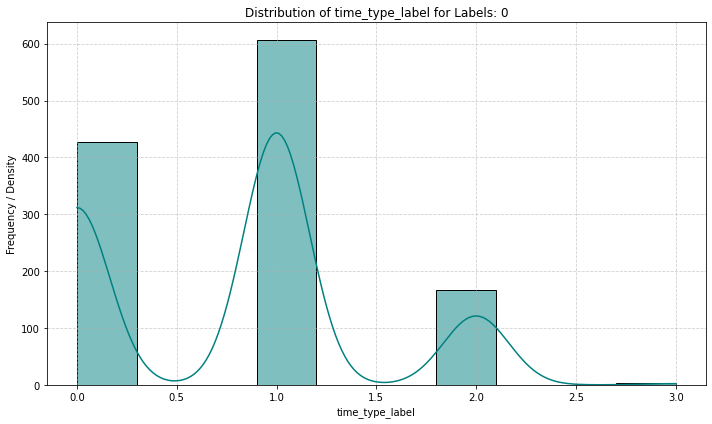


'time_type_label' 변수의 히스토그램을 선택된 'UE_AMT_GRP_encoded' 라벨에 대해 'histogram_time_type_label_filtered_by_labels.png' 파일로 저장했습니다.


In [11]:
# --- 히스토그램 설정 ---
# 종속변수 열 이름 (CSV 파일의 실제 열 이름으로 변경하세요)
target_col_name = 'UE_AMT_GRP_encoded'

# 히스토그램을 그릴 입력 변수 열 이름 (CSV 파일의 실제 열 이름으로 변경하세요)
# 이 변수는 수치형(numerical) 데이터여야 합니다.
variable_to_plot = 'time_type_label' # 예시: 'feature_X', 'feature_Y', 'young_ratio'

# 여기에 보고 싶은 종속변수 라벨 값을 리스트로 입력하세요.
# 예: selected_labels = ['Label_A', 'Label_B']
# 예: selected_labels = [0, 1] (만약 라벨이 숫자로 인코딩된 경우)
# 실제 데이터의 라벨 값과 일치하는지 확인해주세요.
selected_labels = [0] # <--- 이 부분을 원하는 라벨로 수정하세요!


# --- 히스토그램 그리기 로직 ---
if not df.empty:
    if target_col_name in df.columns and variable_to_plot in df.columns:
        # 선택된 라벨에 해당하는 데이터만 필터링합니다.
        df_filtered = df[df[target_col_name].isin(selected_labels)].copy()

        if not df_filtered.empty:
            # 히스토그램 생성
            plt.figure(figsize=(10, 6))
            sns.histplot(
                data=df_filtered,
                x=variable_to_plot,
                kde=True, # 커널 밀도 추정 곡선 추가
                bins=10,  # 히스토그램 막대 개수
                color='teal' # 히스토그램 색상
            )

            # 제목에 어떤 라벨들이 포함되었는지 명시
            plt.title(f'Distribution of {variable_to_plot} for Labels: {", ".join(map(str, selected_labels))}')
            plt.xlabel(variable_to_plot)
            plt.ylabel('Frequency / Density')
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout() # 레이아웃 조정
            plt.savefig(f'histogram_{variable_to_plot}_filtered_by_labels.png') # 이미지 파일로 저장
            plt.show()
            print(f"\n'{variable_to_plot}' 변수의 히스토그램을 선택된 '{target_col_name}' 라벨에 대해 'histogram_{variable_to_plot}_filtered_by_labels.png' 파일로 저장했습니다.")
        else:
            print(f"오류: 선택된 라벨 '{selected_labels}'에 해당하는 데이터가 없습니다. 라벨 값을 확인해주세요.")
    else:
        print(f"오류: 지정된 열 이름('{target_col_name}' 또는 '{variable_to_plot}') 중 일부가 데이터프레임에 없습니다.")
else:
    print("오류: 데이터프레임이 비어 있거나 존재하지 않습니다. CSV 파일을 먼저 불러오거나 예시 데이터를 확인하세요.")

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'AppleGothic'  # 한글 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스(-) 깨짐 방지

/var/folders/q4/msgrrlw53plcx_prs66xy2n40000gn/T/ipykernel_98124/3609214922.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


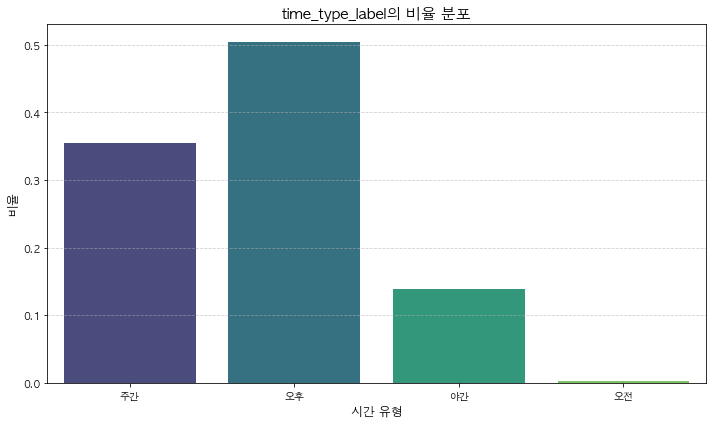


'time_type_label' 변수의 비율 막대 그래프 (X축 라벨 사용자 정의)를 표시했습니다.


In [22]:
# --- 비율 막대 그래프 설정 ---
# 종속변수 열 이름
target_col_name = 'UE_AMT_GRP_encoded'

# 비율을 그릴 범주형 변수 열 이름
variable_to_plot_categorical = 'time_type_label'

# 보고 싶은 종속변수 라벨 값 리스트
selected_labels = [0] # <--- 원하는 라벨로 수정하세요!


# --- X축 라벨 매핑 정의 ---
# 0 -> 주간, 1 -> 오후, 2 -> 야간, 3 -> 오전
custom_ticks = [0, 1, 2, 3] # X축에 표시될 실제 숫자 값들
custom_labels = ['주간', '오후', '야간', '오전'] # 각 숫자에 대응하는 새로운 이름들


# --- 비율 막대 그래프 그리기 로직 ---
if not df.empty and target_col_name in df.columns and variable_to_plot_categorical in df.columns:
    df_filtered = df[df[target_col_name].isin(selected_labels)].copy()
    df_filtered = df_filtered[df_filtered[variable_to_plot_categorical].notna()] # NaN 값 제거 (필요시)

    if not df_filtered.empty:
        # 각 범주의 비율 계산
        proportions = df_filtered[variable_to_plot_categorical].value_counts(normalize=True).reset_index()
        proportions.columns = [variable_to_plot_categorical, 'proportion']

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=proportions,
            x=variable_to_plot_categorical,
            y='proportion',
            palette='viridis',
            # X축 라벨 순서를 명시적으로 지정하여 매핑과 일치시킵니다.
            # value_counts()의 기본 순서가 아닌 custom_ticks의 순서로 막대를 정렬합니다.
            order=custom_ticks
        )

        plt.title(f'{variable_to_plot_categorical}의 비율 분포', fontsize=15, fontweight='bold')
        plt.xlabel('시간 유형', fontsize=12) # X축 전체 라벨 이름
        plt.ylabel('비율', fontsize=12) # Y축 라벨 이름

        # --- X축 라벨 값(눈금)을 사용자 정의합니다 ---
        # ticks: X축에 표시될 실제 데이터 값 (여기서는 0, 1, 2, 3)
        # labels: ticks에 해당하는 새로운 문자열 라벨
        plt.xticks(ticks=custom_ticks, labels=custom_labels, rotation=0, ha='center') # 라벨 매핑 적용

        plt.grid(axis='y', linestyle='--', alpha=0.6) # Y축에만 그리드 표시
        plt.tight_layout() # 레이아웃 자동 조정
        plt.savefig(f'proportion_barplot_{variable_to_plot_categorical}_custom_labels.png') # 이미지 파일로 저장
        plt.show()
        print(f"\n'{variable_to_plot_categorical}' 변수의 비율 막대 그래프 (X축 라벨 사용자 정의)를 표시했습니다.")
    else:
        print(f"오류: 선택된 라벨 '{selected_labels}'에 해당하는 데이터가 없거나 '{variable_to_plot_categorical}'에 유효한 값이 없습니다.")
else:
    print("오류: 데이터프레임이 비어 있거나 존재하지 않습니다. CSV 파일을 먼저 불러오거나 예시 데이터를 확인하세요.")

/var/folders/q4/msgrrlw53plcx_prs66xy2n40000gn/T/ipykernel_98124/2994564744.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


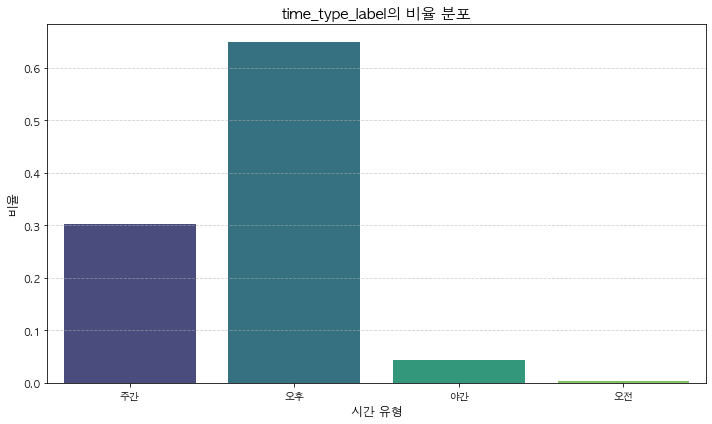


'time_type_label' 변수의 비율 막대 그래프 (X축 라벨 사용자 정의)를 표시했습니다.


In [23]:
# --- 비율 막대 그래프 설정 ---
# 종속변수 열 이름
target_col_name = 'UE_AMT_GRP_encoded'

# 비율을 그릴 범주형 변수 열 이름
variable_to_plot_categorical = 'time_type_label'

# 보고 싶은 종속변수 라벨 값 리스트
selected_labels = [5] # <--- 원하는 라벨로 수정하세요!


# --- X축 라벨 매핑 정의 ---
# 0 -> 주간, 1 -> 오후, 2 -> 야간, 3 -> 오전
custom_ticks = [0, 1, 2, 3] # X축에 표시될 실제 숫자 값들
custom_labels = ['주간', '오후', '야간', '오전'] # 각 숫자에 대응하는 새로운 이름들


# --- 비율 막대 그래프 그리기 로직 ---
if not df.empty and target_col_name in df.columns and variable_to_plot_categorical in df.columns:
    df_filtered = df[df[target_col_name].isin(selected_labels)].copy()
    df_filtered = df_filtered[df_filtered[variable_to_plot_categorical].notna()] # NaN 값 제거 (필요시)

    if not df_filtered.empty:
        # 각 범주의 비율 계산
        proportions = df_filtered[variable_to_plot_categorical].value_counts(normalize=True).reset_index()
        proportions.columns = [variable_to_plot_categorical, 'proportion']

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=proportions,
            x=variable_to_plot_categorical,
            y='proportion',
            palette='viridis',
            # X축 라벨 순서를 명시적으로 지정하여 매핑과 일치시킵니다.
            # value_counts()의 기본 순서가 아닌 custom_ticks의 순서로 막대를 정렬합니다.
            order=custom_ticks
        )

        plt.title(f'{variable_to_plot_categorical}의 비율 분포', fontsize=15, fontweight='bold')
        plt.xlabel('시간 유형', fontsize=12) # X축 전체 라벨 이름
        plt.ylabel('비율', fontsize=12) # Y축 라벨 이름

        # --- X축 라벨 값(눈금)을 사용자 정의합니다 ---
        # ticks: X축에 표시될 실제 데이터 값 (여기서는 0, 1, 2, 3)
        # labels: ticks에 해당하는 새로운 문자열 라벨
        plt.xticks(ticks=custom_ticks, labels=custom_labels, rotation=0, ha='center') # 라벨 매핑 적용

        plt.grid(axis='y', linestyle='--', alpha=0.6) # Y축에만 그리드 표시
        plt.tight_layout() # 레이아웃 자동 조정
        plt.savefig(f'proportion_barplot_{variable_to_plot_categorical}_custom_labels.png') # 이미지 파일로 저장
        plt.show()
        print(f"\n'{variable_to_plot_categorical}' 변수의 비율 막대 그래프 (X축 라벨 사용자 정의)를 표시했습니다.")
    else:
        print(f"오류: 선택된 라벨 '{selected_labels}'에 해당하는 데이터가 없거나 '{variable_to_plot_categorical}'에 유효한 값이 없습니다.")
else:
    print("오류: 데이터프레임이 비어 있거나 존재하지 않습니다. CSV 파일을 먼저 불러오거나 예시 데이터를 확인하세요.")

In [24]:
df['interaction'] = df['LOCAL_UE_CNT_RAT'] * df['young_ratio']

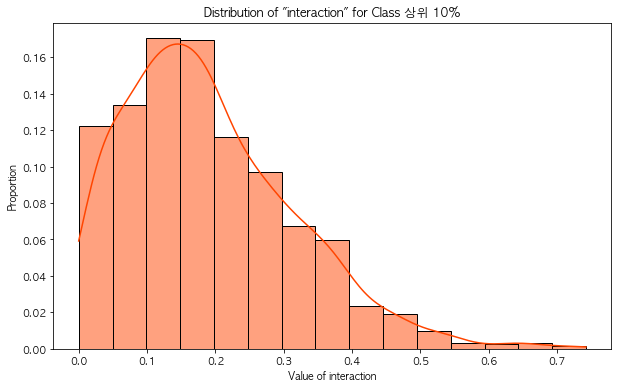

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임이 df라는 이름으로 로드되었다고 가정합니다.
# 'interaction_feature' 컬럼이 df에 존재해야 합니다.

# 1. 사용자가 제공해야 할 정보
CLASS_COLUMN = 'UE_AMT_GRP_encoded'    # 실제 클래스 컬럼명으로 수정
FEATURE_COLUMN = 'interaction' # 실제 변수 컬럼명으로 수정
SELECTED_CLASS = 0                     # 원하는 클래스 숫자로 수정

# 2. 특정 클래스에 해당하는 데이터만 필터링
filtered_df = df[df[CLASS_COLUMN] == SELECTED_CLASS]

# 3. 히스토그램 그리기 (y축을 비율로 변경)
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x=FEATURE_COLUMN, kde=True, stat='probability', color='orangered', binwidth=0.05) # stat='probability' 추가

plt.title(f'Distribution of "{FEATURE_COLUMN}" for Class 상위 10%')
plt.xlabel(f'Value of {FEATURE_COLUMN}')
plt.ylabel('Proportion') # y축 레이블을 'Proportion' (비율)으로 수정
plt.show()

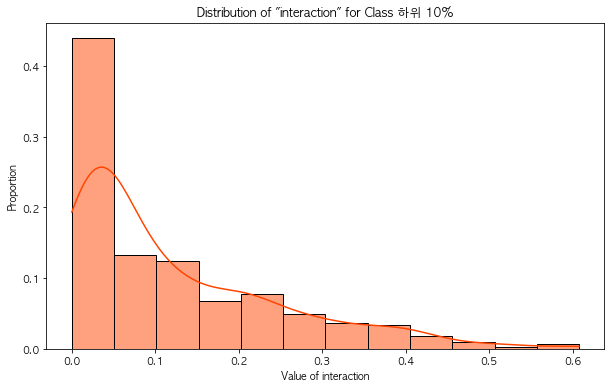

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임이 df라는 이름으로 로드되었다고 가정합니다.
# 'interaction_feature' 컬럼이 df에 존재해야 합니다.

# 1. 사용자가 제공해야 할 정보
CLASS_COLUMN = 'UE_AMT_GRP_encoded'    # 실제 클래스 컬럼명으로 수정
FEATURE_COLUMN = 'interaction' # 실제 변수 컬럼명으로 수정
SELECTED_CLASS = 5                     # 원하는 클래스 숫자로 수정

# 2. 특정 클래스에 해당하는 데이터만 필터링
filtered_df = df[df[CLASS_COLUMN] == SELECTED_CLASS]

# 3. 히스토그램 그리기 (y축을 비율로 변경)
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x=FEATURE_COLUMN, kde=True, stat='probability', color='orangered', binwidth=0.05) # stat='probability' 추가

plt.title(f'Distribution of "{FEATURE_COLUMN}" for Class 하위 10%')
plt.xlabel(f'Value of {FEATURE_COLUMN}')
plt.ylabel('Proportion') # y축 레이블을 'Proportion' (비율)으로 수정
plt.show()